In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from os import listdir
from os.path import isfile, join
import math

import scipy.stats as st

from sklearn.feature_selection import mutual_info_regression as mutual_info

In [69]:
def load(filename):
    df = pd.read_csv('data/'+str(filename)).iloc[:,1:]
    data = df.to_numpy()
    return data, df
    
def load_as_df(filename):
    df = pd.read_csv('data/'+str(filename))
    df = df.drop(columns=['Unnamed: 0'])
    return df

def mean(A):
    return np.mean(A, axis=0)
def var(A):
    return np.var(A, axis=0)
def corM(df, method):
    return df.corr(method=method)

def ttest(vec1, vec2):
    return st.ttest_rec(vec1,vec2)[1]

In [70]:
def plot_scatter(data, name):
    sns.set(style="white", palette="muted", color_codes=True)
    g = sns.pairplot(data, kind="scatter",diag_kind="kde")
    g.fig.suptitle("Scatter matrix: " + name, y =1.01)
    # g.savefig('plots/scatter_matrix_' + name + '.png')
    plt.show()
    plt.close()
# print("Created file: " + 'plots/scatter_matrix_' + name + '.png')

In [71]:
def get_mean_variance(data):
        
    # Calculate mean and variance of each node
    means = mean(data)
    vars = var(data)

    # merge means and vars into one dataframe
    df_means = pd.DataFrame(means)
    df_vars = pd.DataFrame(vars)

    #vstack the two dataframes 
    df_means_vars = pd.concat([df_means, df_vars], axis=1)
    # set column names
    df_means_vars.columns = ['Mean', 'Variance']

    return df_means_vars



Sampling af data uden interventions

       Mean  Variance
A  1.492477  1.097873
B -0.183032  3.953985
C -0.388332  2.362460
D  1.145678  1.356223
E -0.019831  0.040838
F -0.668970  0.605165


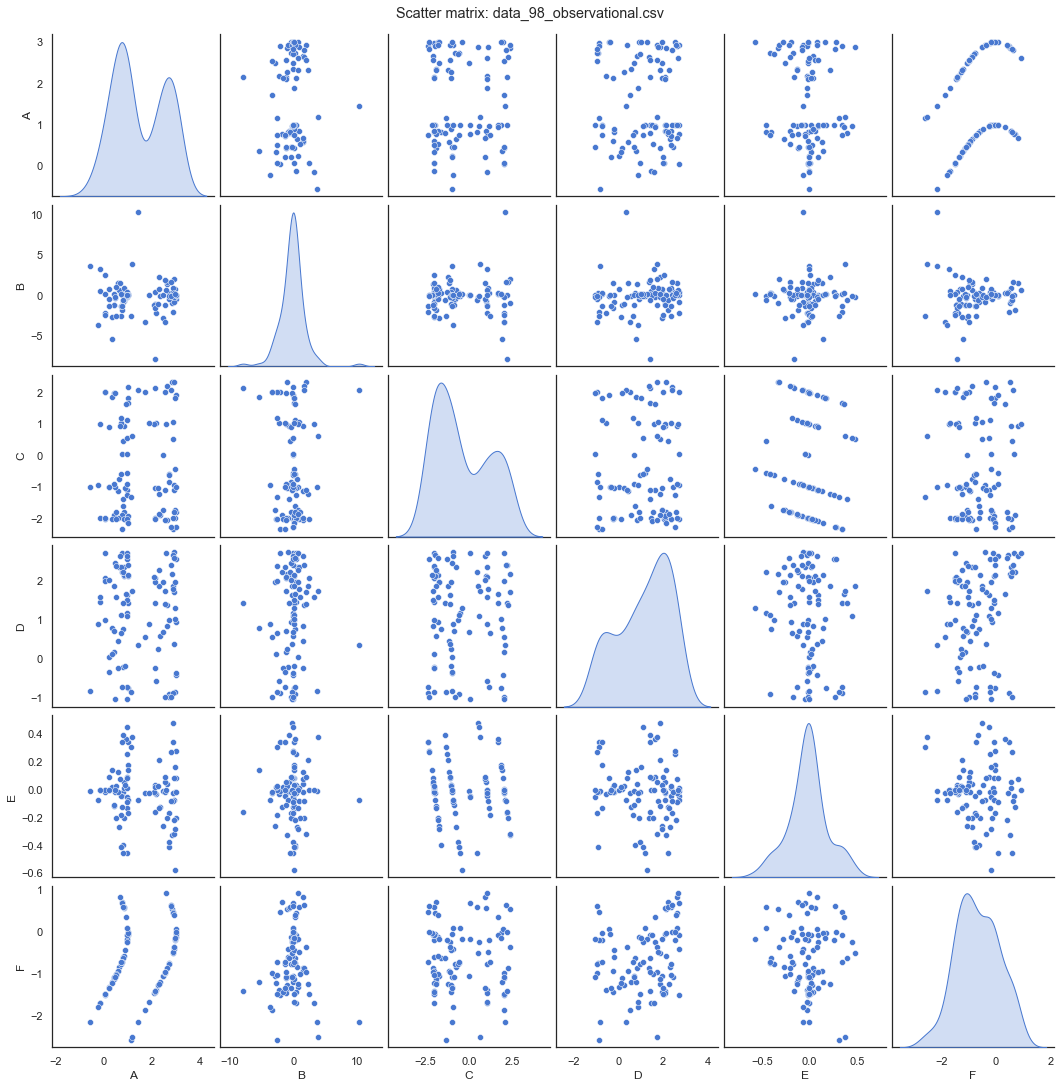

In [72]:
file = "data_98_observational.csv"
data = load_as_df(file)

print(get_mean_variance(data))
plot_scatter(data, file)

Det ligner at der er en sammenhæng mellem A og F samt E og C. Ligner også at der er en underliggende kategorisk fordeling

Vi laver nu en intervention på F=2, som ligger længst væk fra dens mean

       Mean   Variance
A  0.583853   1.000000
B  1.062370  14.000850
C -0.405379   2.490804
D  1.313331   1.080096
E  0.025379   0.016065
F  2.000000   0.000000


C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


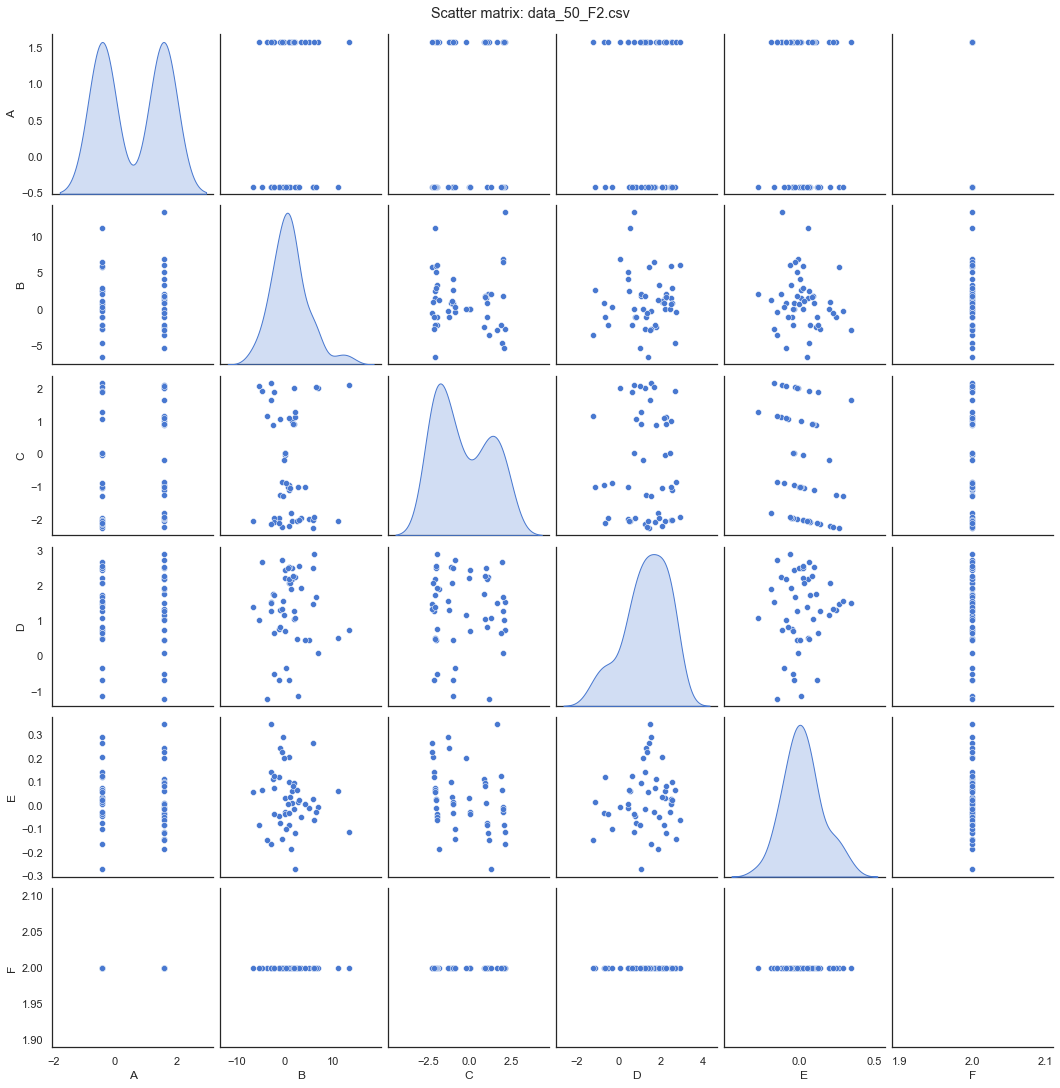

In [62]:
file = "data_50_F2.csv"
data = load_as_df(file)

print(get_mean_variance(data))
plot_scatter(data, file)

Det ses at varians og mean for B ændres meget ved intervention på F=2

Og A bliver kategorisk

Der er altså link fra F til A og F til B 


Det er dog ikke til at sige, om forbindelsen går fra forbindelsen går gennem B eller gennem A til B. Vi bliver altså nødt til at lave en intervention for at fjerne information flow. 

In [65]:
file = "data_50_F2.csv"
data = load_as_df(file)

# Get data where A is below 2
data_cond1 = data[data['A'] <  mean(data['A'])]

print(get_mean_variance(data_cond1))

data_cond2 = data[data['A'] > mean(data['A'])]

print(get_mean_variance(data_cond2))
# plot_scatter(data, file)

       Mean      Variance
A -0.416147  1.232595e-32
B  0.734970  1.369202e+01
C -0.714658  2.392875e+00
D  1.301043  1.007690e+00
E  0.034658  1.459243e-02
F  2.000000  0.000000e+00
       Mean   Variance
A  1.583853   0.000000
B  1.389770  14.095295
C -0.096099   2.397424
D  1.325619   1.152200
E  0.016099   0.017365
F  2.000000   0.000000


       Mean      Variance
A -0.416147  1.232595e-32
B  0.734970  1.369202e+01
C -0.714658  2.392875e+00
D  1.301043  1.007690e+00
E  0.034658  1.459243e-02
F  2.000000  0.000000e+00
25
25


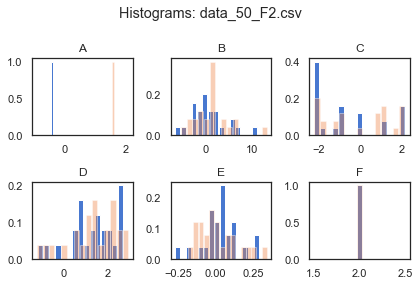

In [68]:

file = "data_50_F2.csv"
data = load_as_df(file)

# Get data where A is below 2

print(get_mean_variance(data_cond1))

# data_cond2 = data[data['A'] > 2]

# print(get_mean_variance(data_cond2))
# plot_scatter(data, file)

bins = 15
# create histogram of each node

fig, axs = plt.subplots(2, 3, tight_layout=True)
axs = axs.flatten()
# set title for plot    
fig.suptitle("Histograms: " + file, y =0.99)

data_cond1 = data[data['A'] <  mean(data['A'])]
data_cond2 = data[data['A'] > mean(data['A'])]

print(len(data_cond1))
print(len(data_cond2))

for k, column in enumerate(data_cond1.columns):
    axs[k].set_title(column)
    axs[k].hist(data_cond1[column], bins=bins,rwidth=0.9, weights=np.ones(len(data_cond1[column]))/len(data_cond1[column]))
    axs[k].hist(data_cond2[column], bins=bins,rwidth=0.9, alpha = 0.4, weights=np.ones(len(data_cond2[column]))/len(data_cond2[column]))




# for k, column in enumerate(data_cond2.columns):
#     axs[k].set_title(column)
#     axs[k].hist(data[column], bins=bins,rwidth=0.9, weights=np.ones(len(data[column]))/len(data[column]), alpha=0.4 )

        

In [29]:
file = "data_98_observational.csv"
data = load_as_df(file)

print(get_mean_variance(data))

file = "data_50_F-0.5.csv"
data = load_as_df(file)


print(get_mean_variance(data))

file = "data_30_F0.csv"
data = load_as_df(file)

print(get_mean_variance(data))

file = "data_30_D0.csv"
data = load_as_df(file)

print(get_mean_variance(data))

       Mean  Variance
A  1.492477  1.097873
B -0.183032  3.953985
C -0.388332  2.362460
D  1.145678  1.356223
E -0.019831  0.040838
F -0.668970  0.605165
       Mean  Variance
A  1.677583  0.960000
B -0.052146  0.683612
C -0.283903  2.472177
D  0.934250  1.443245
E  0.043903  0.060860
F -0.500000  0.000000
       Mean  Variance
A  1.866667  0.982222
B  0.000000  0.000000
C -0.447329  2.756689
D  1.343044  1.104491
E  0.047329  0.095061
F  0.000000  0.000000
       Mean  Variance
A  1.439067  1.280280
B -1.069356  4.102540
C -0.300000  2.810000
D  0.000000  0.000000
E  0.000000  0.000000
F -0.682265  0.971139


C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


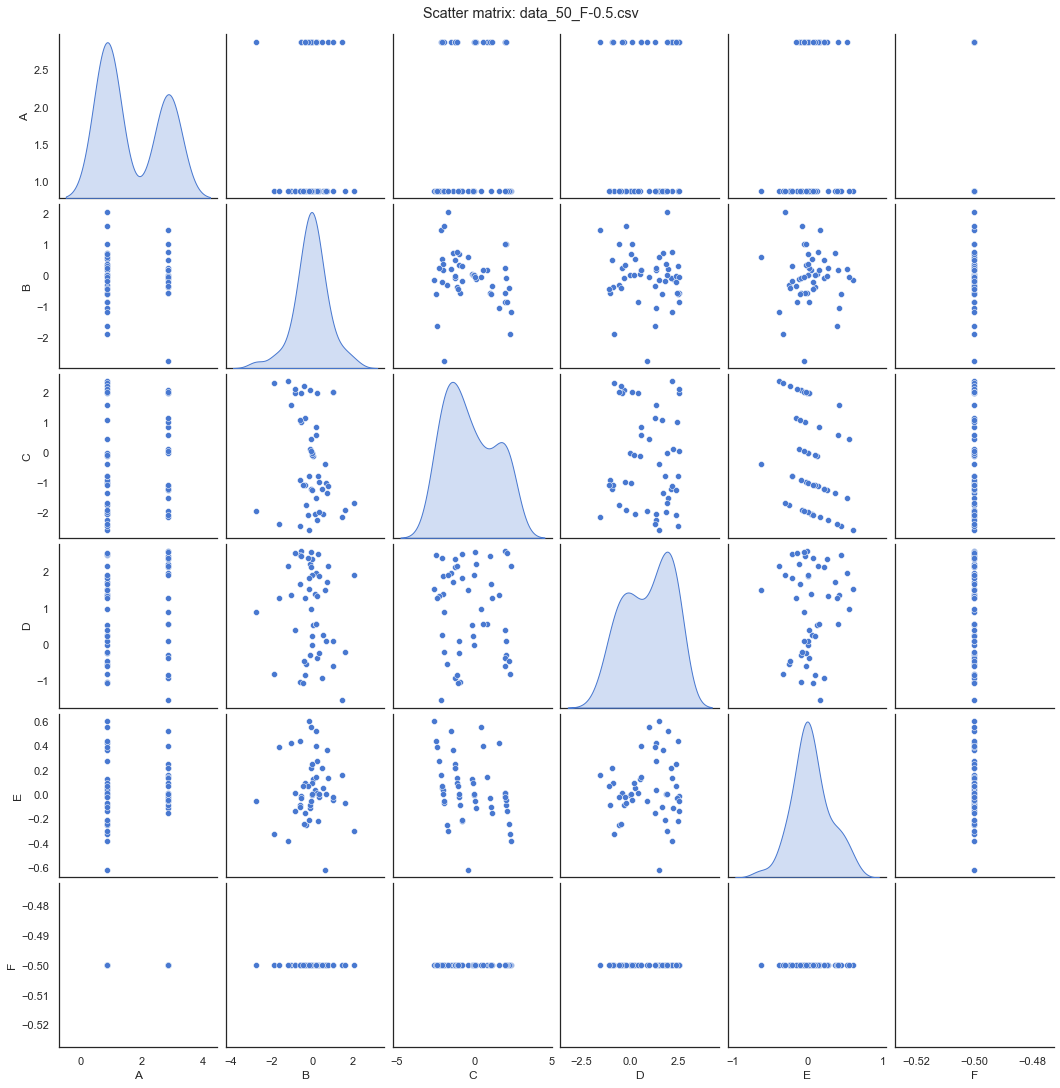

       Mean  Variance
A  1.677583  0.960000
B -0.052146  0.683612
C -0.283903  2.472177
D  0.934250  1.443245
E  0.043903  0.060860
F -0.500000  0.000000


In [20]:
file = "data_50_F-0.5.csv"
data = load_as_df(file)

plot_scatter(data, file)
print(get_mean_variance(data))